# RNN

<img src='https://i.postimg.cc/1XXBP85P/image.png' width='100%'>

# char RNN

<img src='https://i.postimg.cc/h48MWqDf/image.png' width='100%'>

<img src='https://i.postimg.cc/SK0zxJVq/image.png' width='100%'>

<img src='https://i.postimg.cc/PxXJCZDG/image.png' width='100%'>

다음과 같은 결과를 얻는 것을 목표로 한다.
* h --> e
* e --> l
* l --> l
* l --> o

RNN이 어려운 문제인 이유는, 첫 번째 입력의 'l'과 두 번째 입력의 'l'은 같지만 서로 다른 출력값을 반환해야 하기 때문이다. 이는 이전의 정보를 이용함으로써 문제를 해결할 수 있다. 첫 번째 입력의 'l'은 그 전에 'e'라는 입력이 들어온 상태이고, 두 번째 입력의 'l'은 그 전에 'l'이라는 입력이 들어온 상태이다.

In [0]:
# rnn_hello_TF2.ipynb

import numpy as np
from tensorflow.keras import layers
# One hot encoding for each char in 'hello'
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

# One cell RNN input_dim (4) -> output_dim (3)
x_data = np.array([[h]], dtype=np.float32)

hidden_size = 3
# return_sequences=True: output값을 여러 개 출력
rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)

print(x_data, x_data.shape)
print(outputs, outputs.shape)

[[[1. 0. 0. 0.]]] (1, 1, 4)
tf.Tensor([[[ 0.71568215 -0.57035714  0.06901541]]], shape=(1, 1, 3), dtype=float32) (1, 1, 3)


<img src='https://i.postimg.cc/g2BrxrDr/image.png' width='100%'>

In [0]:
# One cell RNN input_dim (4) -> output_dim (3). sequence: 5
x_data = np.array([[h, e, l, l, o]], dtype=np.float32)
print(x_data, x_data.shape)

hidden_size = 3
rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True, return_state=True)    
outputs, states = rnn(x_data)

# outputs: 모든 값
# states: 마지막 값

print(outputs, outputs.shape)
print(states, states.shape)

[[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]] (1, 5, 4)
tf.Tensor(
[[[ 0.4823286   0.30011362 -0.47388852]
  [ 0.29089662  0.13868399  0.6868762 ]
  [-0.3997777   0.4588976  -0.48634696]
  [-0.45610353 -0.45184177  0.43111527]
  [ 0.15397821 -0.81801033 -0.88592345]]], shape=(1, 5, 3), dtype=float32) (1, 5, 3)
tf.Tensor([[ 0.15397821 -0.81801033 -0.88592345]], shape=(1, 3), dtype=float32) (1, 3)


<img src='https://i.postimg.cc/4NWx0njw/image.png' width='100%'>

# many to many RNN

In [0]:
# rnn_hello_many2many_TF2.ipynb

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [0]:
text = "hello"

In [0]:
char_vocab = sorted(list(set(text)))
vocab_size=len(char_vocab)
print(char_vocab)
print ('글자 집합의 크기 : {}'.format(vocab_size))


['e', 'h', 'l', 'o']
글자 집합의 크기 : 4


In [0]:
char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 글자에 고유한 정수 인덱스 부여
print(char_to_index)

{'e': 0, 'h': 1, 'l': 2, 'o': 3}


In [0]:
_tmp = []
for ch in text:
    _tmp.append(char_to_index[ch])
_tmp

[1, 0, 2, 2, 3]

In [0]:
train_X = [_tmp[:4]]
train_y = [_tmp[1:]]
train_X, train_y

([[1, 0, 2, 2]], [[0, 2, 2, 3]])

In [0]:
seq_length = 4
n_samples = 1

In [0]:
train_X = to_categorical(train_X)
train_y = to_categorical(train_y)
print(train_X.shape)
print(train_X)

(1, 4, 3)
[[[0. 1. 0.]
  [1. 0. 0.]
  [0. 0. 1.]
  [0. 0. 1.]]]


In [0]:
print(train_y.shape)
print(train_y)

(1, 4, 4)
[[[1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]]


In [0]:
# return_squences=True 옵션을 주어 cost를 many2many 방식으로 계산하도록 한다.

n_hidden = 5
model = Sequential()
model.add(layers.SimpleRNN(n_hidden, input_shape=(None, train_X.shape[2]), return_sequences=True))
model.add(layers.TimeDistributed(layers.Dense(vocab_size, activation='softmax')))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, None, 5)           45        
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 4)           24        
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs = 400, verbose=2)

Epoch 1/400
1/1 - 0s - loss: 1.6883 - accuracy: 0.0000e+00
Epoch 2/400
1/1 - 0s - loss: 1.6829 - accuracy: 0.0000e+00
Epoch 3/400
1/1 - 0s - loss: 1.6774 - accuracy: 0.0000e+00
Epoch 4/400
1/1 - 0s - loss: 1.6720 - accuracy: 0.0000e+00
Epoch 5/400
1/1 - 0s - loss: 1.6667 - accuracy: 0.0000e+00
Epoch 6/400
1/1 - 0s - loss: 1.6613 - accuracy: 0.0000e+00
Epoch 7/400
1/1 - 0s - loss: 1.6560 - accuracy: 0.0000e+00
Epoch 8/400
1/1 - 0s - loss: 1.6506 - accuracy: 0.0000e+00
Epoch 9/400
1/1 - 0s - loss: 1.6454 - accuracy: 0.0000e+00
Epoch 10/400
1/1 - 0s - loss: 1.6401 - accuracy: 0.0000e+00
Epoch 11/400
1/1 - 0s - loss: 1.6348 - accuracy: 0.0000e+00
Epoch 12/400
1/1 - 0s - loss: 1.6296 - accuracy: 0.0000e+00
Epoch 13/400
1/1 - 0s - loss: 1.6244 - accuracy: 0.0000e+00
Epoch 14/400
1/1 - 0s - loss: 1.6192 - accuracy: 0.0000e+00
Epoch 15/400
1/1 - 0s - loss: 1.6141 - accuracy: 0.0000e+00
Epoch 16/400
1/1 - 0s - loss: 1.6089 - accuracy: 0.0000e+00
Epoch 17/400
1/1 - 0s - loss: 1.6038 - accuracy: 

In [0]:
pred = model.predict(train_X)
pred

array([[[0.4506357 , 0.15787773, 0.32030398, 0.07118263],
        [0.16269718, 0.04518893, 0.6882049 , 0.10390897],
        [0.25209627, 0.03388103, 0.67233205, 0.04169066],
        [0.03490585, 0.02607902, 0.15905276, 0.7799624 ]]], dtype=float32)

In [0]:
np.argmax(pred, 2)

array([[0, 2, 2, 3]])

# many to one RNN

<img src='https://i.postimg.cc/wTK0yc2R/image.png' width='100%'>

In [0]:
# rnn_many-to-one_TF2.ipynb

# setup
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model
from tensorflow.keras.preprocessing.sequence import pad_sequences

Prepairing dataset

In [0]:
# example data
words = ['good', 'bad', 'worse', 'so good']
y_data = [[1],[0],[0],[1]]

# creating a token dictionary
char_set = ['<pad>'] + sorted(list(set(''.join(words))))
idx2char = {idx : char for idx, char in enumerate(char_set)}
char2idx = {char : idx for idx, char in enumerate(char_set)}

print(char_set)
print(idx2char)
print(char2idx)

['<pad>', ' ', 'a', 'b', 'd', 'e', 'g', 'o', 'r', 's', 'w']
{0: '<pad>', 1: ' ', 2: 'a', 3: 'b', 4: 'd', 5: 'e', 6: 'g', 7: 'o', 8: 'r', 9: 's', 10: 'w'}
{'<pad>': 0, ' ': 1, 'a': 2, 'b': 3, 'd': 4, 'e': 5, 'g': 6, 'o': 7, 'r': 8, 's': 9, 'w': 10}


In [0]:
# converting sequence of tokens to sequence of indices
x_data = list(map(lambda word : [char2idx.get(char) for char in word], words))
x_data_len = list(map(lambda word : len(word), x_data))

print(x_data)
print(x_data_len)

[[6, 7, 7, 4], [3, 2, 4], [10, 7, 8, 9, 5], [9, 7, 1, 6, 7, 7, 4]]
[4, 3, 5, 7]


In [0]:
# padding the sequence of indices
# x_data의 길이가 다 다르다. 이 문제를 해결하기 위해 padding을 사용한다.

max_sequence = 10
x_data = pad_sequences(sequences = x_data, maxlen = max_sequence,
                       padding = 'post', truncating = 'post')
y_data = np.array(y_data)
# checking data
print(x_data)
print(y_data)

[[ 6  7  7  4  0  0  0  0  0  0]
 [ 3  2  4  0  0  0  0  0  0  0]
 [10  7  8  9  5  0  0  0  0  0]
 [ 9  7  1  6  7  7  4  0  0  0]]
[[1]
 [0]
 [0]
 [1]]


<img src='https://i.postimg.cc/FzPrqsD2/image.png' width='100%'>

Creating model

In [0]:
# creating simple rnn for "many to one" classification
input_dim = len(char2idx)           # 11
output_dim = len(char2idx)          # 11
one_hot = np.eye(len(char2idx))     # len(char2idx) 크기를 가진 단위행렬
hidden_size = 10
num_classes = 2 # 0일 확률, 1일 확률을 계산

model = Sequential()
model.add(layers.Embedding(input_dim=input_dim, output_dim=output_dim,
                           mask_zero=True, input_length=max_sequence,
                           embeddings_initializer=keras.initializers.Constant(one_hot)))
model.add(layers.SimpleRNN(units=hidden_size))
model.add(layers.Dense(units=num_classes))  # output이 하나이므로 TimeDistributed가 아닌 Dense를 사용한다.

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 11)            121       
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 10)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 363
Trainable params: 363
Non-trainable params: 0
_________________________________________________________________


In [0]:
x_data

array([[ 6,  7,  7,  4,  0,  0,  0,  0,  0,  0],
       [ 3,  2,  4,  0,  0,  0,  0,  0,  0,  0],
       [10,  7,  8,  9,  5,  0,  0,  0,  0,  0],
       [ 9,  7,  1,  6,  7,  7,  4,  0,  0,  0]], dtype=int32)

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_data, y_data, epochs=30)

Epoch 1/30
1/1 [==============================] - 0s 2ms/step - loss: 1.1638 - accuracy: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 1ms/step - loss: 0.8537 - accuracy: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 1ms/step - loss: 0.7507 - accuracy: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.7500
Epoch 5/30
1/1 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.7500
Epoch 6/30
1/1 [==============================] - 0s 1ms/step - loss: 0.6141 - accuracy: 0.7500
Epoch 7/30
1/1 [==============================] - 0s 1ms/step - loss: 0.5864 - accuracy: 0.7500
Epoch 8/30
1/1 [==============================] - 0s 1ms/step - loss: 0.5623 - accuracy: 0.7500
Epoch 9/30
1/1 [==============================] - 0s 1ms/step - loss: 0.5406 - accuracy: 0.7500
Epoch 10/30
1/1 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.7500
Epoch 11/30
1/1 [======================

In [0]:
yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1)
print(y_data, yhat)

[[1]
 [0]
 [0]
 [1]] [1 1 0 1]


# LSTM

<img src='https://i.postimg.cc/x8LcqbyM/image.png' width='100%'>

<img src='https://i.postimg.cc/j57jkJ1m/image.png' width='100%'>

# Stacked RNN

<img src='https://i.postimg.cc/h48DzgRL/image.png' width='100%'>

In [0]:
# rnn_longchar_many2many_TF2.ipynb

import numpy as np
import urllib.request
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed

In [0]:
lines = ["if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea."]

In [0]:
text = ' '.join(lines)
print('문자열의 길이 또는 총 글자의 개수: %d' % len(text))

문자열의 길이 또는 총 글자의 개수: 180


In [0]:
print(text)

if you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.


In [0]:
char_vocab = sorted(list(set(text)))
vocab_size=len(char_vocab)
print ('글자 집합의 크기 : {}'.format(vocab_size))

글자 집합의 크기 : 25


In [0]:
char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 글자에 고유한 정수 인덱스 부여
print(char_to_index)

{' ': 0, "'": 1, ',': 2, '.': 3, 'a': 4, 'b': 5, 'c': 6, 'd': 7, 'e': 8, 'f': 9, 'g': 10, 'h': 11, 'i': 12, 'k': 13, 'l': 14, 'm': 15, 'n': 16, 'o': 17, 'p': 18, 'r': 19, 's': 20, 't': 21, 'u': 22, 'w': 23, 'y': 24}


In [0]:
index_to_char={}
for key, value in char_to_index.items():
    index_to_char[value] = key
print(index_to_char)

{0: ' ', 1: "'", 2: ',', 3: '.', 4: 'a', 5: 'b', 6: 'c', 7: 'd', 8: 'e', 9: 'f', 10: 'g', 11: 'h', 12: 'i', 13: 'k', 14: 'l', 15: 'm', 16: 'n', 17: 'o', 18: 'p', 19: 'r', 20: 's', 21: 't', 22: 'u', 23: 'w', 24: 'y'}


In [0]:
seq_length = 10 # 문장의 길이는 10으로 한다.
n_samples = int(np.floor((len(text) - 1) / seq_length)) # 문자열을 10등분한다. 그러면 즉, 총 샘플의 개수
print ('문장 샘플의 수 : {}'.format(n_samples))

문장 샘플의 수 : 17


In [0]:
_tmp = []

for i in range(n_samples): 
    X_sample = text[i * seq_length: (i + 1) * seq_length]
    # 0:10 -> 10:20 -> 20:30로 loop를 돌면서 문장 샘플을 1개씩 가져온다.
    X_encoded = [char_to_index[c] for c in X_sample] # 하나의 문장 샘플에 대해서 정수 인코딩
    _tmp.append(X_encoded)

In [0]:
train_X = _tmp[:-1]
train_y = _tmp[1:]

In [0]:
print(train_X)
print(train_y)

[[12, 9, 0, 24, 17, 22, 0, 23, 4, 16], [21, 0, 21, 17, 0, 5, 22, 12, 14, 7], [0, 4, 0, 20, 11, 12, 18, 2, 0, 7], [17, 16, 1, 21, 0, 7, 19, 22, 15, 0], [22, 18, 0, 18, 8, 17, 18, 14, 8, 0], [21, 17, 10, 8, 21, 11, 8, 19, 0, 21], [17, 0, 6, 17, 14, 14, 8, 6, 21, 0], [23, 17, 17, 7, 0, 4, 16, 7, 0, 7], [17, 16, 1, 21, 0, 4, 20, 20, 12, 10], [16, 0, 21, 11, 8, 15, 0, 21, 4, 20], [13, 20, 0, 4, 16, 7, 0, 23, 17, 19], [13, 2, 0, 5, 22, 21, 0, 19, 4, 21], [11, 8, 19, 0, 21, 8, 4, 6, 11, 0], [21, 11, 8, 15, 0, 21, 17, 0, 14, 17], [16, 10, 0, 9, 17, 19, 0, 21, 11, 8], [0, 8, 16, 7, 14, 8, 20, 20, 0, 12]]
[[21, 0, 21, 17, 0, 5, 22, 12, 14, 7], [0, 4, 0, 20, 11, 12, 18, 2, 0, 7], [17, 16, 1, 21, 0, 7, 19, 22, 15, 0], [22, 18, 0, 18, 8, 17, 18, 14, 8, 0], [21, 17, 10, 8, 21, 11, 8, 19, 0, 21], [17, 0, 6, 17, 14, 14, 8, 6, 21, 0], [23, 17, 17, 7, 0, 4, 16, 7, 0, 7], [17, 16, 1, 21, 0, 4, 20, 20, 12, 10], [16, 0, 21, 11, 8, 15, 0, 21, 4, 20], [13, 20, 0, 4, 16, 7, 0, 23, 17, 19], [13, 2, 0, 5, 22, 2

In [0]:
encoded_X = to_categorical(train_X)
encoded_y = to_categorical(train_y)

In [0]:
print('encoded_X의 크기(shape) : {}'.format(encoded_X.shape)) # 원-핫 인코딩
print('encoded_y의 크기(shape) : {}'.format(encoded_y.shape)) # 원-핫 인코딩

encoded_X의 크기(shape) : (16, 10, 25)
encoded_y의 크기(shape) : (16, 10, 25)


In [0]:
n_hidden = 50
model = Sequential()
model.add(LSTM(n_hidden, input_shape=(None, encoded_X.shape[2]), return_sequences=True))
model.add(LSTM(n_hidden, return_sequences=True))
model.add(LSTM(n_hidden, return_sequences=True))
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(encoded_X, encoded_y, epochs=1000, verbose=2)

Epoch 1/1000
1/1 - 0s - loss: 3.2182 - accuracy: 0.0437
Epoch 2/1000
1/1 - 0s - loss: 3.2149 - accuracy: 0.0938
Epoch 3/1000
1/1 - 0s - loss: 3.2114 - accuracy: 0.1312
Epoch 4/1000
1/1 - 0s - loss: 3.2078 - accuracy: 0.1500
Epoch 5/1000
1/1 - 0s - loss: 3.2040 - accuracy: 0.1875
Epoch 6/1000
1/1 - 0s - loss: 3.1997 - accuracy: 0.2000
Epoch 7/1000
1/1 - 0s - loss: 3.1949 - accuracy: 0.1937
Epoch 8/1000
1/1 - 0s - loss: 3.1896 - accuracy: 0.1875
Epoch 9/1000
1/1 - 0s - loss: 3.1834 - accuracy: 0.1875
Epoch 10/1000
1/1 - 0s - loss: 3.1763 - accuracy: 0.1875
Epoch 11/1000
1/1 - 0s - loss: 3.1681 - accuracy: 0.1875
Epoch 12/1000
1/1 - 0s - loss: 3.1586 - accuracy: 0.1875
Epoch 13/1000
1/1 - 0s - loss: 3.1474 - accuracy: 0.1875
Epoch 14/1000
1/1 - 0s - loss: 3.1344 - accuracy: 0.1875
Epoch 15/1000
1/1 - 0s - loss: 3.1194 - accuracy: 0.1875
Epoch 16/1000
1/1 - 0s - loss: 3.1022 - accuracy: 0.1875
Epoch 17/1000
1/1 - 0s - loss: 3.0828 - accuracy: 0.1875
Epoch 18/1000
1/1 - 0s - loss: 3.0617 - 

In [0]:
print(text)

for vec in np.array([train_X[0]]):
    for idx in vec:
        print(index_to_char[idx], end= "")

for i in range(16):
    pred = model.predict(encoded_X[i].reshape(1,10,25))
    pred = np.argmax(pred, 2)
    for vec in pred:
        for idx in vec:
            print(index_to_char[idx], end= "")

if you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.
if you want to buildoa ship, don't drum n theople together to collect nood and don't assign them tas s and worh, but rather teach them to loog for the endless iomensity o

# RNN Example(Stock Data)

In [0]:
# rnn_stockPrice_TF2.ipynb

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

# Open, High, Low, Volume, Close
xy = np.loadtxt('/gdrive/My Drive/University Lecture/데이터마이닝/Datasets/stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]  # Close as label
seq_length = 7   # input sequence

In [0]:
# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    # print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

In [0]:
# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

print(trainX.shape, trainY.shape)

(507, 7, 5) (507, 1)


In [0]:
model = Sequential()
model.add(layers.LSTM(16, input_shape=(trainX.shape[1], trainX.shape[2]), activation='relu', return_sequences=False))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 16)                1408      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,425
Trainable params: 1,425
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(trainX, trainY, epochs=100, batch_size=16, verbose = 2)
pred = model.predict(testX)

Epoch 1/100
32/32 - 1s - loss: 0.1187
Epoch 2/100
32/32 - 1s - loss: 0.0210
Epoch 3/100
32/32 - 1s - loss: 0.0066
Epoch 4/100
32/32 - 1s - loss: 0.0028
Epoch 5/100
32/32 - 1s - loss: 0.0023
Epoch 6/100
32/32 - 1s - loss: 0.0021
Epoch 7/100
32/32 - 1s - loss: 0.0021
Epoch 8/100
32/32 - 1s - loss: 0.0020
Epoch 9/100
32/32 - 1s - loss: 0.0020
Epoch 10/100
32/32 - 1s - loss: 0.0019
Epoch 11/100
32/32 - 1s - loss: 0.0019
Epoch 12/100
32/32 - 1s - loss: 0.0018
Epoch 13/100
32/32 - 1s - loss: 0.0018
Epoch 14/100
32/32 - 1s - loss: 0.0018
Epoch 15/100
32/32 - 1s - loss: 0.0017
Epoch 16/100
32/32 - 1s - loss: 0.0017
Epoch 17/100
32/32 - 1s - loss: 0.0016
Epoch 18/100
32/32 - 1s - loss: 0.0016
Epoch 19/100
32/32 - 1s - loss: 0.0015
Epoch 20/100
32/32 - 1s - loss: 0.0015
Epoch 21/100
32/32 - 1s - loss: 0.0016
Epoch 22/100
32/32 - 1s - loss: 0.0014
Epoch 23/100
32/32 - 1s - loss: 0.0014
Epoch 24/100
32/32 - 1s - loss: 0.0014
Epoch 25/100
32/32 - 1s - loss: 0.0013
Epoch 26/100
32/32 - 1s - loss: 0.

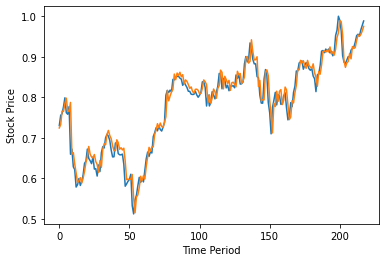

In [0]:
# Plot predictions
plt.plot(testY)
plt.plot(pred)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()

# Quiz

RNN에 대해 틀린 것은?
 * RNN 은 주로 자연어 처리에 사용된다. --> 올바른 설명
 * RNN은 Reinforcement Neural Network의 역자다. --> 틀린 설명